# Mobile Price Classification

#### Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
#### He does not know how to estimate the price of mobiles his company creates.
#### In this competitive mobile phone market you cannot simply
#### assume things. To solve this problem he collects sales data of mobile
#### phones of various companies.
#### Bob wants to find out some relation between features of a mobile
#### phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so
#### good at Machine Learning. So he needs your help to solve this problem.

In [1]:
from IPython.display import Image
Image(url='https://m-cdn.phonearena.com/images/article/64576-wide-two_940/The-Best-Phones-in-2022-updated-August', width=1000, height=800)

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Reading Data

In [3]:
train = pd.read_csv('../input/texhuplabs/Dataset train.csv')
test = pd.read_csv('../input/texhuplabs/Dataset test.csv')

In [4]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [8]:
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [9]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# EDA(Exploratory Data Analysis)

# Checking for class Imbalance

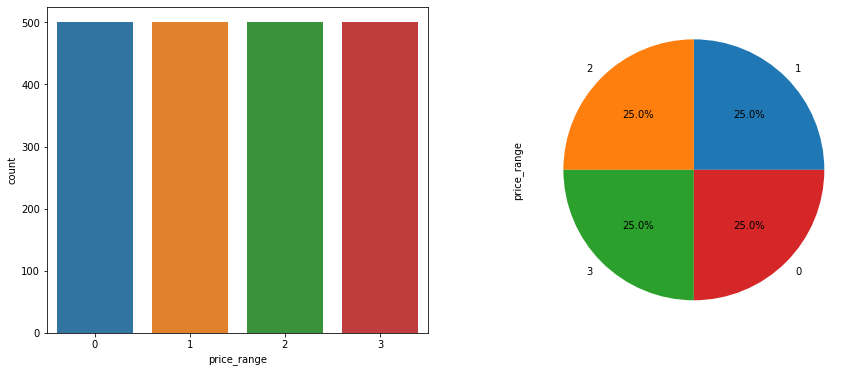

In [10]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='price_range', data=train, ax=ax[0])
_ = train['price_range'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

# Correlation Between Features

<AxesSubplot:>

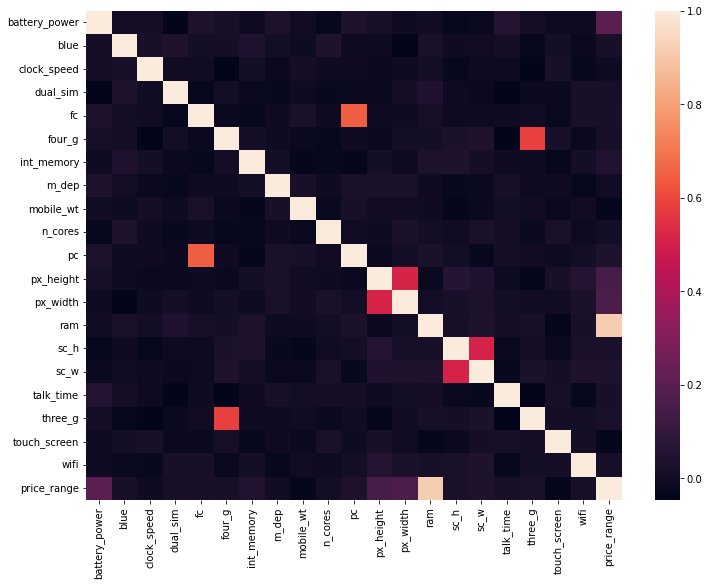

In [11]:
corrmat = train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

In [12]:
df = train.drop('price_range',axis=1)

In [13]:
corr_ = df.corrwith(train["price_range"]).abs().sort_values(ascending=False)
corr_

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
dtype: float64

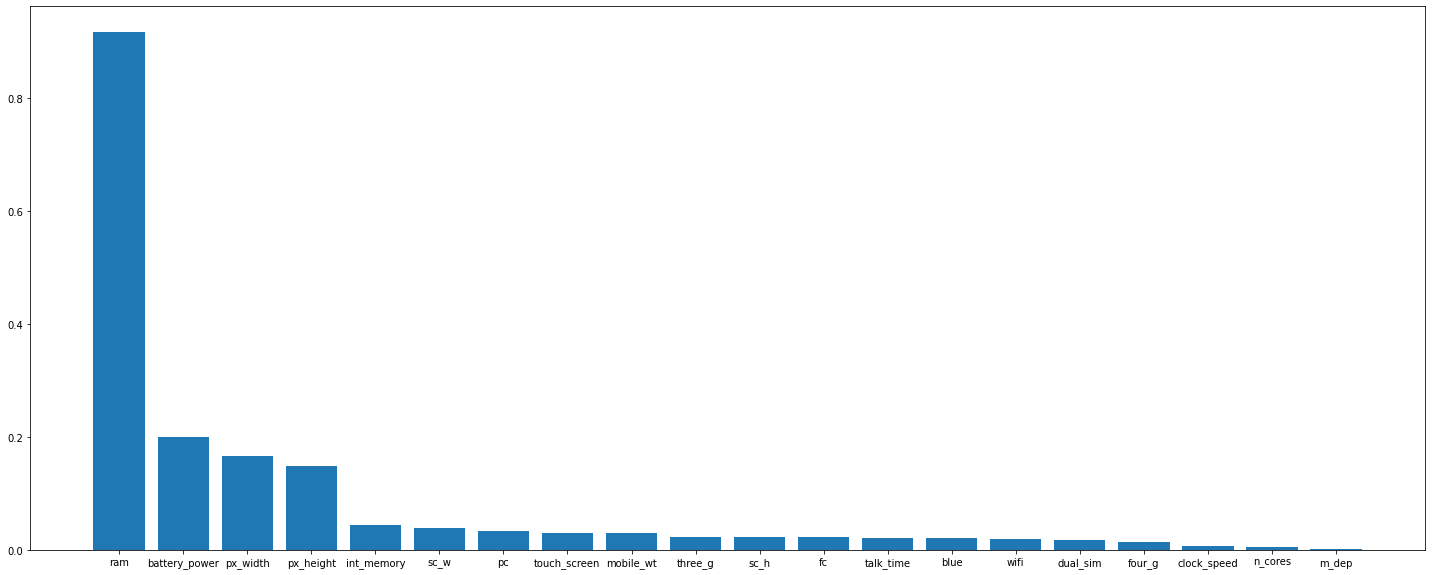

In [14]:
plt.figure(figsize=(25,10))
plt.bar(corr_.index,corr_)
plt.show()

## Checking Distribution of each Feature

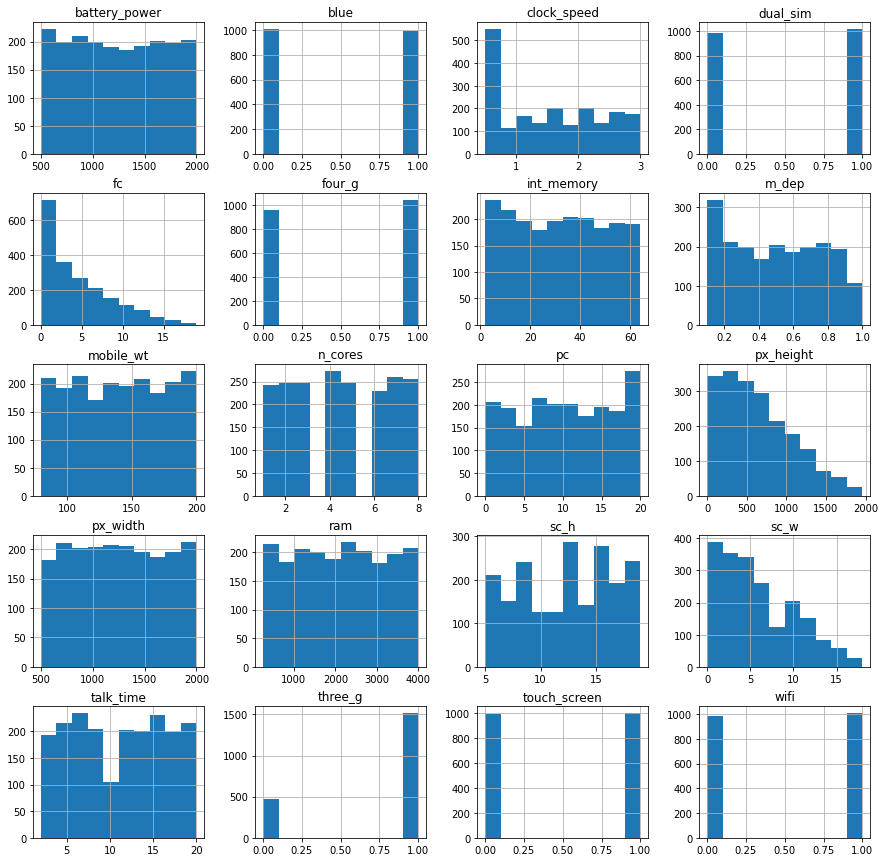

In [15]:
df.hist(figsize=(15,15))
plt.show()

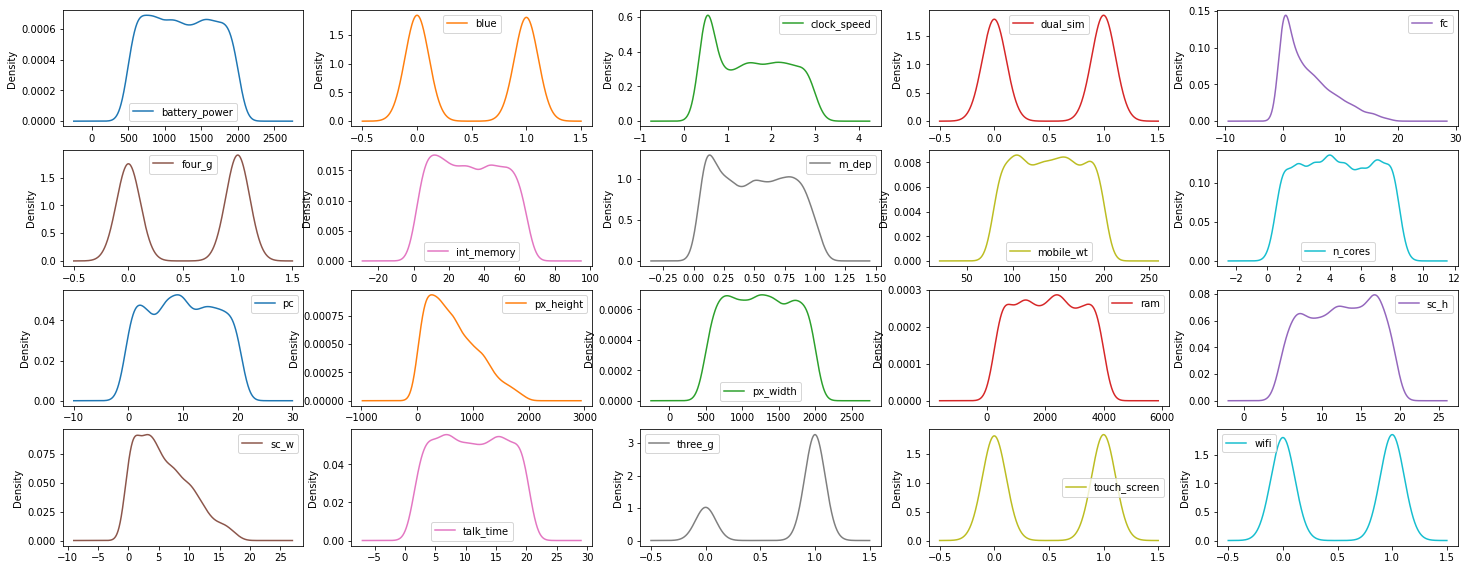

In [16]:
df.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(25,15))
plt.show()

## Separating Categorical and Numerical Features

In [17]:
categorical_features = []
for col in df.columns:
    if(df[col].nunique()<30):
        categorical_features.append(col)
print(df[categorical_features].nunique().sort_values())

blue             2
dual_sim         2
four_g           2
three_g          2
touch_screen     2
wifi             2
n_cores          8
m_dep           10
sc_h            15
sc_w            19
talk_time       19
fc              20
pc              21
clock_speed     26
dtype: int64


In [18]:
numerical_features = list(set(df.columns) - set(categorical_features))
numerical_features

['mobile_wt', 'battery_power', 'int_memory', 'ram', 'px_width', 'px_height']

In [19]:
df[numerical_features].corrwith(train["price_range"]).abs().sort_values(ascending=False)

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
mobile_wt        0.030302
dtype: float64

## Checking Distribution of Data based on Ram and Battery Power

<AxesSubplot:xlabel='ram', ylabel='battery_power'>

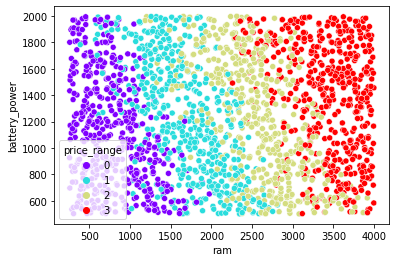

In [20]:
sns.scatterplot(x=train['ram'],y=train['battery_power'],hue=train['price_range'],palette="rainbow")

<AxesSubplot:xlabel='price_range', ylabel='ram'>

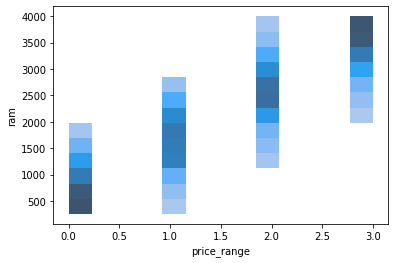

In [21]:
sns.histplot(x="price_range",y="ram",data=train)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

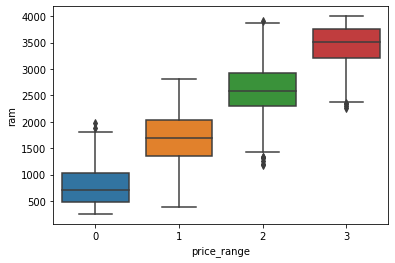

In [22]:
sns.boxplot(data=train,y="ram",x="price_range")

## Visualizing relation between Ram and PriceRange based on different categorical Features.

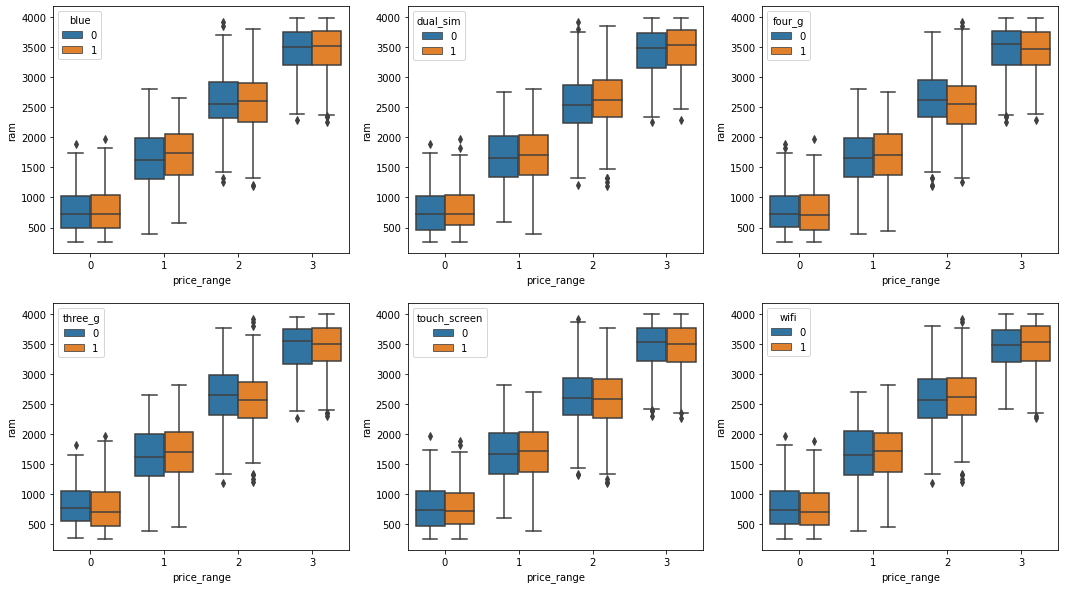

In [23]:
fig,axes=plt.subplots(2,3,figsize=(18,10))
cat=['blue','dual_sim','four_g','three_g','touch_screen','wifi']
k=0
for i in range(2):
    for j in range(3):
        sns.boxplot(ax=axes[i,j],x="price_range",y="ram",data=train,hue=cat[k])
        k+=1

## Visualizing realtion between numerical features and PriceRange

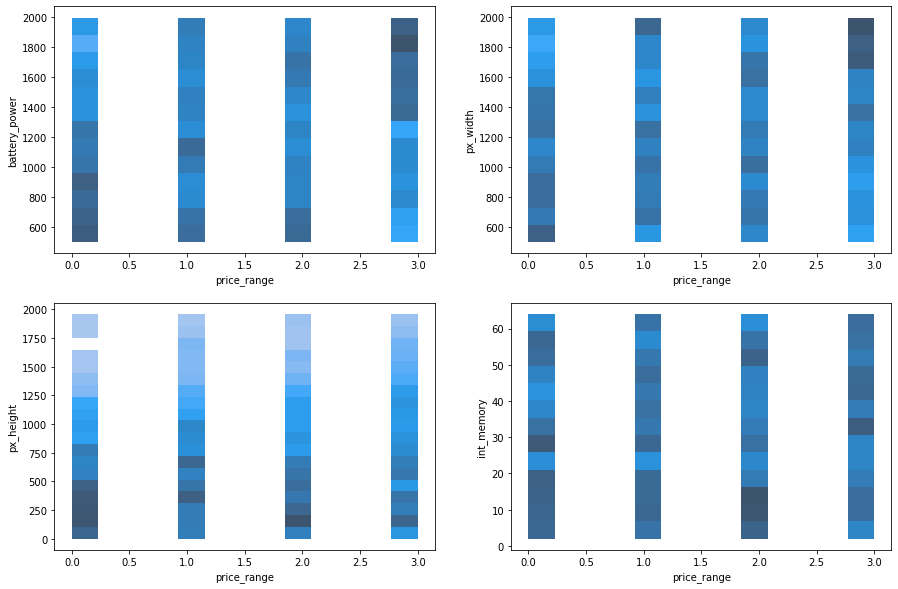

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
imp=['battery_power', 'px_width', 'px_height','int_memory']
k=0
for i in range(2):
    for j in range(2):
        sns.histplot(ax=axes[i,j],x="price_range",y=imp[k],data=train)
        k+=1

## Checking numerical Features for outliers

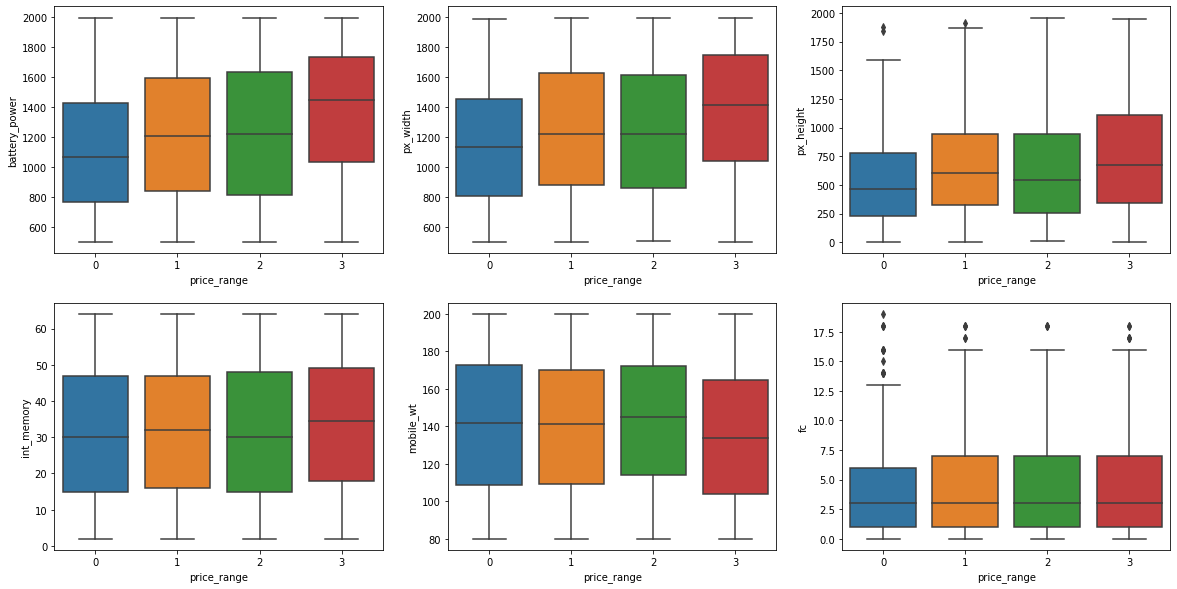

In [25]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
imp=['battery_power', 'px_width', 'px_height','int_memory','mobile_wt','fc']
k=0
for i in range(2):
    for j in range(3):
        sns.boxplot(ax=axes[i,j],x="price_range",y=imp[k],data=train)
        k+=1

## Removing Outliers

In [26]:
for x in ['fc','px_height']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    
    train.loc[train[x] < min,x] = np.nan
    train.loc[train[x] > max,x] = np.nan 

df.isnull().sum()

df = df.dropna(axis = 0)
train = train.dropna(axis=0)

df = df.reset_index().drop(['index'],axis=1)
train = train.reset_index().drop(['index'],axis=1)

df.shape

(1980, 20)

In [27]:
df[categorical_features].corrwith(train["price_range"]).abs().sort_values(ascending=False)

sc_w            0.038076
touch_screen    0.033888
pc              0.033871
sc_h            0.025641
three_g         0.025462
fc              0.021120
talk_time       0.020582
dual_sim        0.019016
wifi            0.017192
four_g          0.015906
blue            0.015798
n_cores         0.008307
clock_speed     0.006120
m_dep           0.000925
dtype: float64

## Visualising relation between Various Categorical Features and PriceRange

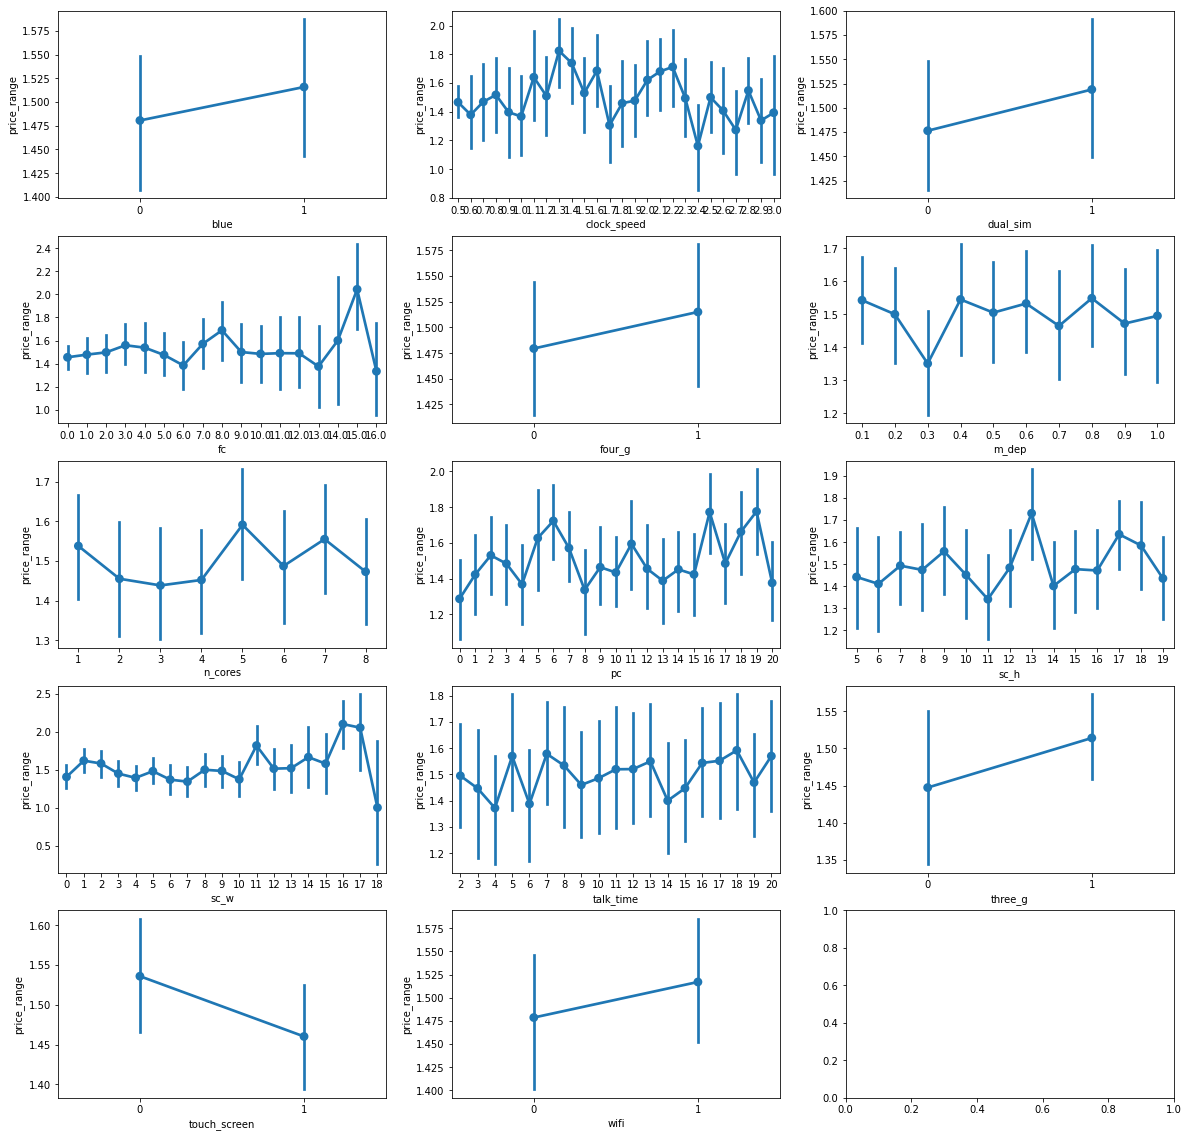

In [28]:
fig,axes=plt.subplots(5,3,figsize=(20,20))
cat=categorical_features
k=0
for i in range(5):
    for j in range(3):
        if(k<14):
            sns.pointplot(ax=axes[i,j],y="price_range",x=cat[k],data=train, xlabel=cat[k])
            k+=1

Text(0.5, 0, 'MegaPixels')

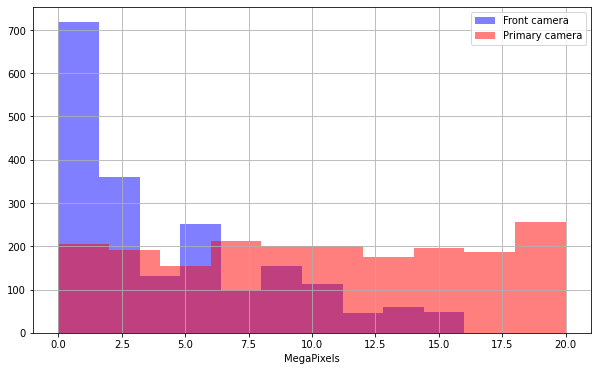

In [29]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

# Visualising realtion between Categorical Features and PriceRange based on Count

In [30]:
train['isBluetooth'] = ' '
for i in range(train.shape[0]):
    if train['blue'][i] == 0:
        train['isBluetooth'][i] = 'No'
    else:
        train['isBluetooth'][i] = 'Yes'     
           
px.histogram(data_frame = train, x = 'isBluetooth', color = 'price_range', 
             title = 'Comparison of devices sold having Bluetooth or not', width=500,height=400)

In [31]:
train['isDualSim'] = ' '
for i in range(len(train)):
    if train['dual_sim'][i] == 0:
        train['isDualSim'][i] = 'No'
    else:
        train['isDualSim'][i] = 'Yes'   
        
px.histogram(data_frame = train, x = 'isDualSim', color = 'price_range', 
             title = 'Comparison of devices sold having Dual Sim or not',width=500,height=400)  

In [32]:
train['isFour_g'] = ' '
for i in range(len(train)):
    if train['four_g'][i] == 0:
        train['isFour_g'][i] = 'No'
    else:
        train['isFour_g'][i] = 'Yes'
        
px.histogram(data_frame = train, x = 'isFour_g', color = 'price_range', 
             title = 'Comparison of devices sold having Four_g or not',width=500,height=400)          

In [33]:
train['isThree_g'] = ' '
for i in range(len(train)):
    if train['three_g'][i] == 0:
        train['isThree_g'][i] = 'No'
    else:
        train['isThree_g'][i] = 'Yes'
px.histogram(data_frame = train, x = 'isThree_g', color = 'price_range', 
             title = 'Comparison of devices sold having Three_g or not',width=500,height=400)        

In [34]:
train['isTouchScreen'] = ' '
for i in range(len(train)):
    if train['touch_screen'][i] == 0:
        train['isTouchScreen'][i] = 'No'
    else:
        train['isTouchScreen'][i] = 'Yes'

px.histogram(data_frame = train, x = 'isTouchScreen', color = 'price_range', 
             title = 'Comparison of devices sold having TouchScreen or not',width=500,height=400)           

In [35]:
train['isWifi'] = ' '
for i in range(len(train)):
    if train['wifi'][i] == 0:
        train['isWifi'][i] = 'No'
    else:
        train['isWifi'][i] = 'Yes'

px.histogram(data_frame = train, x = 'isWifi', color = 'price_range', 
             title = 'Comparison of devices sold having Wifi or not',width=500,height=400)         

In [36]:
train['Cores'] = ' '
for i in range(len(train)):
    if train['n_cores'][i] == 1:
        train['Cores'][i] = 'Single-Core'
    elif train['n_cores'][i] == 2:
        train['Cores'][i] = 'Dual-Core'
    elif train['n_cores'][i] == 3:
        train['Cores'][i] = 'Triple-Core'
    elif train['n_cores'][i] == 4:
        train['Cores'][i] = 'Quad-Core'
    elif train['n_cores'][i] == 5:
        train['Cores'][i] = 'Penta-Core'
    elif train['n_cores'][i] == 6:
        train['Cores'][i] = 'Hexa-Core'
    elif train['n_cores'][i] == 7:
        train['Cores'][i] = 'Hepta-Core'
    else:
        train['Cores'][i] = 'Octa-Core'


px.histogram(data_frame = train, x = 'Cores', color = 'price_range', 
             title = 'Comparison of devices sold having Different Cores',width=500,height=400)        

# Scaling the Data

In [37]:
sc=RobustScaler()
X_=sc.fit_transform(df)

In [38]:
X_ = pd.DataFrame(X_,columns=df.columns)

In [39]:
def visualizer(data,scaled_data, scaler_name):
    fig = go.Figure()
    draft_template = go.layout.Template()
    fig.add_trace(go.Scatter(
        x = list(data.head(10)["int_memory"].values),
        y = list(data.head(10)["n_cores"].values),
        mode='markers',
        marker=dict(size=9,line=dict(width=3, color='DarkSlateGrey')),marker_line_color="midnightblue",marker_color="lightskyblue"))

    fig.add_trace(go.Scatter(
        x = list(scaled_data.head(10)["int_memory"].values),
        y = list(scaled_data.head(10)["n_cores"].values),
        mode='markers', marker=dict(size=9,line=dict(width=2, color='DarkSlateGrey'))))

    fig.update_layout(template=draft_template,title_text='{} Data Distribution'.format(scaler_name),width=500,height=500)
    fig.update_xaxes(title_text='n_cores')
    fig.update_yaxes(title_text='int_memory')
    fig['data'][0]['name'] = 'Before Scaling'
    fig['data'][1]['name'] = 'After Scaling'
    fig.show()

visualizer(df,X_,"Robust Scaler")    

# Dimentionality Reduction Techniques

## PCA (Principal Component Analysis)

In [40]:
pca = PCA()
comp = pca.fit_transform(X_)

In [41]:
comp.shape

(1980, 20)

In [42]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

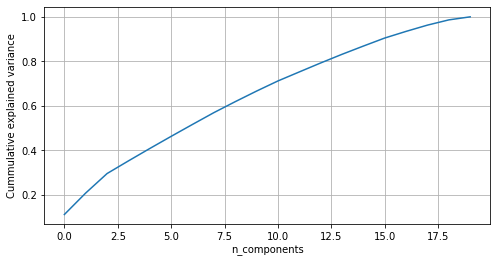

In [43]:
plt.figure(figsize=(8,4))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show()

In [44]:
# 95% variance can be captured by 17 components

pca = PCA(n_components=17)
comp = pca.fit_transform(X_)
pca_comp = pd.DataFrame(comp,columns=[f'pca-{i}' for i in range(17)])

In [45]:
pca_comp.corrwith(train["price_range"])

pca-0     0.029617
pca-1     0.173088
pca-2    -0.024915
pca-3    -0.223601
pca-4     0.674973
pca-5    -0.424763
pca-6     0.075502
pca-7     0.349688
pca-8     0.206051
pca-9     0.017696
pca-10   -0.058414
pca-11   -0.093662
pca-12    0.035115
pca-13   -0.120811
pca-14   -0.002481
pca-15   -0.035230
pca-16    0.016566
dtype: float64

## K-means Clustering

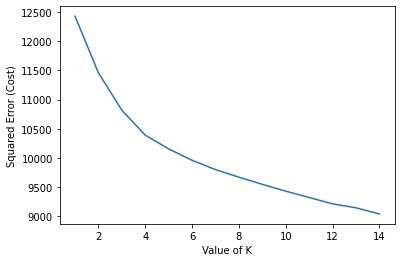

In [46]:
cost = []
for i in range(1,15):
    KM = KMeans(n_clusters = i,max_iter = 500)
    KM.fit(X_)
    
    # calculates squared error for the clustered points
    cost.append(KM.inertia_)  
    
    # KM.inertia_ : Sum of squared distances of samples to their closest cluster center, 
    #                   weighted by the sample weights if provided.
    
    # plot the cost against K values
plt.plot(range(1,15), cost)
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [47]:
kmeans = KMeans(n_clusters = 4,random_state=42).fit(X_)
kmeans_comp = pd.DataFrame(kmeans.labels_,columns=["kmeans"])

In [48]:
kmeans_comp.corrwith(train["price_range"])

kmeans    0.110138
dtype: float64

## LDA (Linear Discriminant Analysis)

In [49]:
lda=LinearDiscriminantAnalysis(n_components=3)
lda_comp=lda.fit_transform(X_,train["price_range"])
lda_comp.shape

(1980, 3)

In [50]:
lda_comp = pd.DataFrame(lda_comp,columns=["lda1","lda2","lda3"])

In [51]:
lda_comp.corrwith(train["price_range"])

lda1    0.958250
lda2   -0.004595
lda3   -0.001041
dtype: float64

## Final Dataset

In [52]:
X_ = pd.concat([X_,lda_comp,kmeans_comp,pca_comp],axis=1)

In [53]:
X_.shape

(1980, 41)

In [54]:
Y = train["price_range"]

# Spliting the data 

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_, Y, stratify=Y, test_size = 0.2,random_state = 42)

In [56]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Linear Regression Model

In [57]:
lm = LinearRegression()
lm.fit(X_train,y_train)

y_predict_train_linreg = lm.predict(X_train)
y_predict_test_linreg = lm.predict(X_test)

train_accuracy_score_linreg=lm.score(X_train,y_train)
test_accuracy_score_linreg=lm.score(X_test,y_test)

print(train_accuracy_score_linreg)
print(test_accuracy_score_linreg)

0.9196232801691032
0.9116229658814744


# Logistic Regression Model

In [58]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)

0.9867424242424242
0.9646464646464646


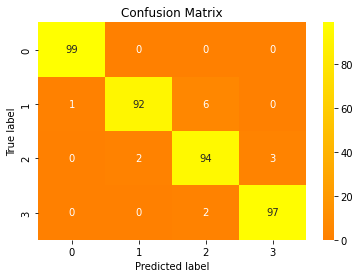


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.93      0.98      0.95        94
           2       0.95      0.92      0.94       102
           3       0.98      0.97      0.97       100

    accuracy                           0.96       396
   macro avg       0.96      0.97      0.96       396
weighted avg       0.97      0.96      0.96       396



In [59]:
cm_logreg = confusion_matrix(y_test,y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)
print("\nClassification Report:\n%s"%classification_report(y_predict_test_logreg,y_test))

# Random Forest Model

In [60]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 2,min_samples_split= 5)
rf.fit(X_train, y_train)

y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)

0.9829545454545454
0.9545454545454546


In [61]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

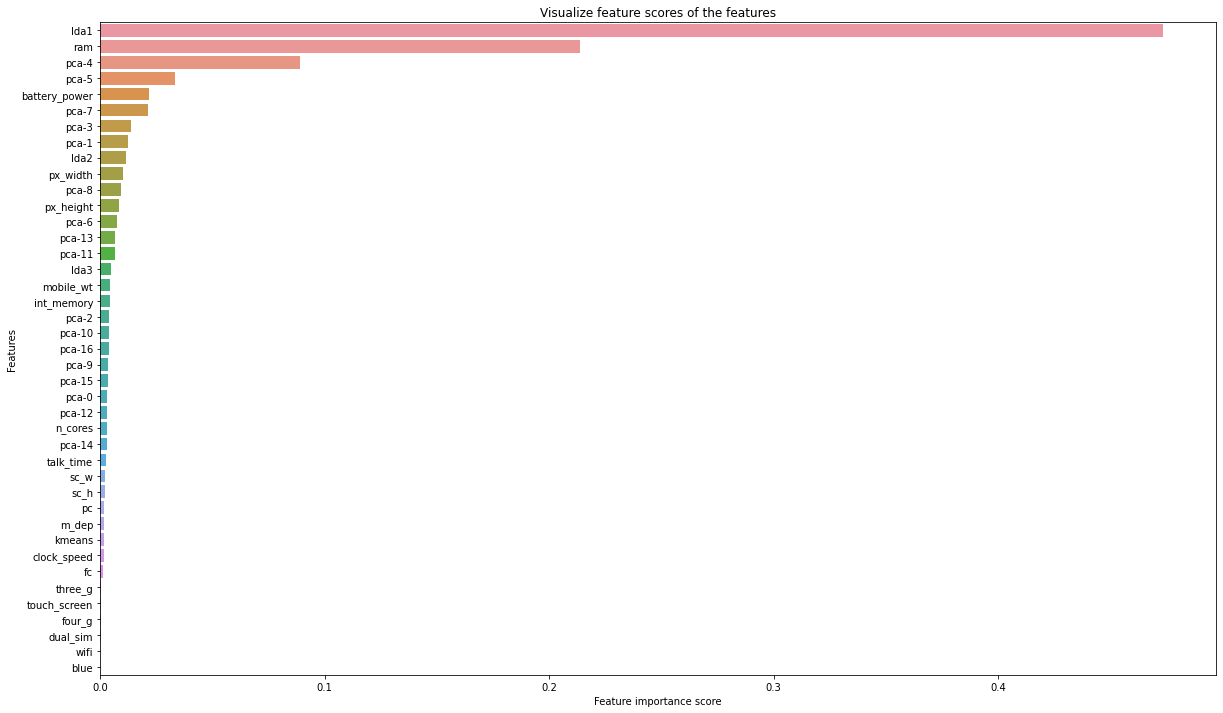

In [62]:
f, ax = plt.subplots(figsize=(20,12))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

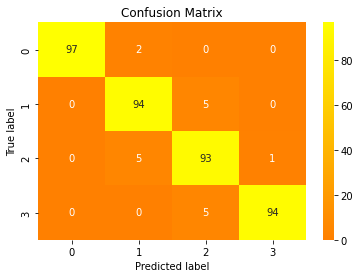


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       0.95      0.93      0.94       101
           2       0.94      0.90      0.92       103
           3       0.95      0.99      0.97        95

    accuracy                           0.95       396
   macro avg       0.95      0.96      0.95       396
weighted avg       0.95      0.95      0.95       396



In [63]:
cm_rf = confusion_matrix(y_test,y_predict_test_rf)
draw_confusion_matrix(cm_rf)
print("\nClassification Report:\n%s"%classification_report(y_predict_test_rf,y_test))

# KNN(K Nearest Neighbour) Model

In [64]:
error_rate = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

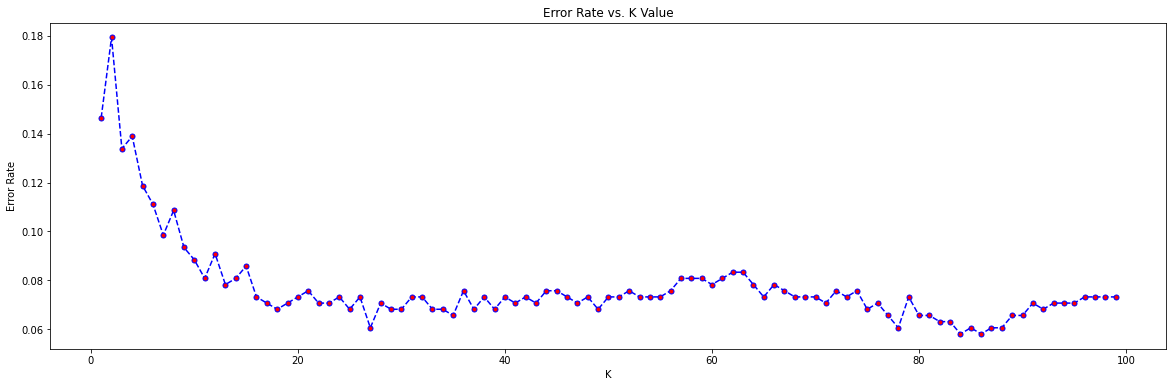

In [65]:
plt.figure(figsize=(20,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [66]:
model = KNeighborsClassifier(n_neighbors=80)
model.fit(X_train,y_train)

y_predict_train_KNN = model.predict(X_train)
y_predict_test_KNN = model.predict(X_test)

train_accuracy_score_KNN = accuracy_score(y_train, y_predict_train_KNN)
test_accuracy_score_KNN = accuracy_score(y_test, y_predict_test_KNN)

print(train_accuracy_score_KNN)
print(test_accuracy_score_KNN)

0.9494949494949495
0.9343434343434344


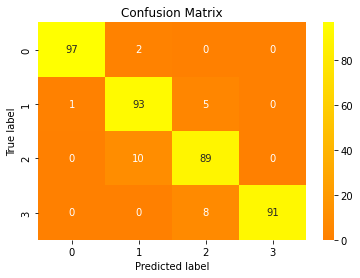


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.94      0.89      0.91       105
           2       0.90      0.87      0.89       102
           3       0.92      1.00      0.96        91

    accuracy                           0.93       396
   macro avg       0.93      0.94      0.94       396
weighted avg       0.93      0.93      0.93       396



In [67]:
cm_KNN = confusion_matrix(y_test,y_predict_test_KNN)
draw_confusion_matrix(cm_KNN)
print("\nClassification Report:\n%s"%classification_report(y_predict_test_KNN,y_test))

# Decision Tree Classifier

In [68]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_predict_train_DT = model.predict(X_train)
y_predict_test_DT = model.predict(X_test)

train_accuracy_score_DT = accuracy_score(y_train, y_predict_train_DT)
test_accuracy_score_DT = accuracy_score(y_test, y_predict_test_DT)

print(train_accuracy_score_DT)
print(test_accuracy_score_DT)

1.0
0.9393939393939394


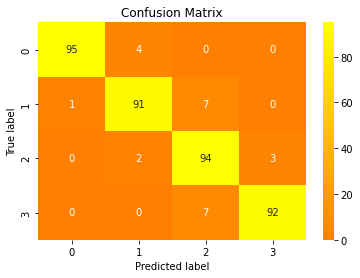


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        96
           1       0.92      0.94      0.93        97
           2       0.95      0.87      0.91       108
           3       0.93      0.97      0.95        95

    accuracy                           0.94       396
   macro avg       0.94      0.94      0.94       396
weighted avg       0.94      0.94      0.94       396



In [69]:
cm_rf = confusion_matrix(y_test,y_predict_test_DT)
draw_confusion_matrix(cm_rf)
print("\nClassification Report:\n%s"%classification_report(y_predict_test_DT,y_test))

# Comparing Accuracy Score of Each Model

In [70]:
classifiers = ['Linear Regression','Logistic Regression','KNN','Decision Tree', 'Random Forest']
lst_acc = [test_accuracy_score_linreg, test_accuracy_score_logreg, test_accuracy_score_KNN, test_accuracy_score_DT,test_accuracy_score_rf]
df = pd.DataFrame({'Model': classifiers, 'Accuracy': lst_acc})
px.histogram(data_frame = df, x = 'Model', y = 'Accuracy',color="Accuracy")

# Calculating the Cross Validation Score of Each Model

In [71]:
Skfold = StratifiedKFold(n_splits=10)
xyz = []
accuracy=[]
classifiers=['Logistic Regression','Decision Tree', 'Random forest', 'KNN']
models=[LogisticRegression(random_state=42),
        DecisionTreeClassifier(random_state=42), 
        RandomForestClassifier(random_state=42, n_estimators=100, max_depth=6, criterion = 'entropy', 
                            min_samples_leaf= 2,min_samples_split= 5), KNeighborsClassifier(n_neighbors=80)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X_train, y_train, cv = Skfold, scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

cv_models_dataframe=pd.DataFrame(xyz, index=classifiers)   
cv_models_dataframe.columns=['CV Mean']    
cv_models_dataframe
cv_models_dataframe.sort_values(['CV Mean'], ascending=[0])

,CV Mean
Logistic Regression,0.975388
Random forest,0.958339
Decision Tree,0.951389
KNN,0.945092


# Comparing CrossValidation Score of Various Models

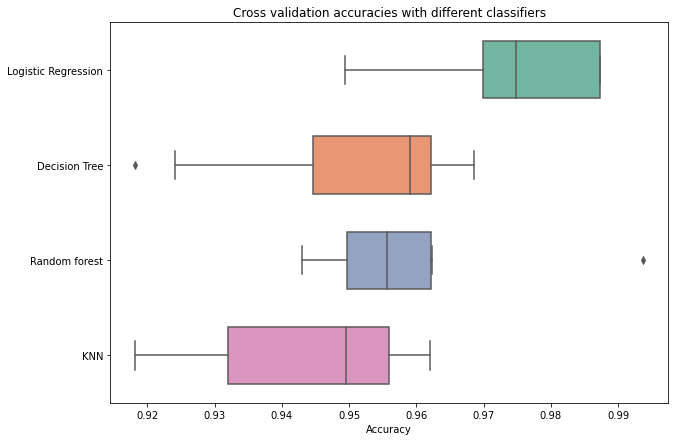

In [72]:
box=pd.DataFrame(accuracy,index=[classifiers])
boxT = box.T
plt.figure(figsize = (10, 7))
ax = sns.boxplot(data=boxT, orient="h", palette="Set2", width=.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross validation accuracies with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()

# Predicting on Test Data

In [73]:
def testPreprocessing(kmeans,data,pca,sc,lda):
    
    data=data.drop(['id'],axis=1)
    test=sc.transform(data)
    comp = pca.transform(test)
    pca_comp = pd.DataFrame(comp,columns=[f'pca-{i}' for i in range(17)])
    kmean = kmeans.predict(test)
    kmeans_comp = pd.DataFrame(kmean,columns=["kmeans"])
    lda_comp=lda.transform(test)
    lda_comp = pd.DataFrame(lda_comp,columns=["lda1","lda2","lda3"])
    test = pd.DataFrame(test,columns=data.columns)
    test = pd.concat([test,lda_comp,kmeans_comp,pca_comp],axis=1)
    
    return test

In [74]:
testData = testPreprocessing(kmeans,test,pca,sc,lda)

# Using Logistic Regression as Predictor

preds = logreg.predict(testData)
predictions = pd.DataFrame({'id':test.id,"price_range":preds})
predictions

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2
